Monte Carlo Simulation of Geometric Brownian Motion
-----------------------

- This script performes a monte carlo simulation of Geometric Brownian motion using the Black-Scholes Model
- It animates the simulation, plots the probability density function of the results and displays some notable Probabilities

Import Libraries
--------

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt

Import Stock Data
--------

In [28]:
yf.pdr_override() 

start_date = (dt.datetime.now() - dt.timedelta(days=1)).strftime('%Y-%m-%d')

stock = 'AAPL'

df = pdr.get_data_yahoo(stock, start=start_date)

S0 = df.loc[start_date][3] #Inital stock price at current time

print(S0)

[*********************100%%**********************]  1 of 1 completed
179.36000061035156


Define Constants
---------

In [114]:
drift = 0.1 #mu

volatility = 0.3 #sigma

t = 1

n_steps = 100

n_sims = 10000

dt = t/n_steps

Calculate stock price at each step
-----------------

In [127]:
#Find value of stock at each step
St = np.exp((drift-volatility**2/2)*dt+volatility*norm.rvs(0,np.sqrt(dt),size=(n_sims,n_steps))).T

#Add row of ones to top to allow us to perform cumulative product
St = np.vstack([np.ones(n_sims), St]) 

#Finds cumulative product down the column to find new stock price based
St = S0*St.cumprod(axis=0)  

Find the maximum and minimum stock price
------------------------

In [116]:
y_max = S0
for i in range(n_sims):
    if max(St[:,i]) > y_max:
        y_max = max(St[:,i])

y_min = S0
for i in range(n_sims):
    if min(St[:,i]) < y_min:
        y_min = min(St[:,i])

Animate the simulation
---------------

<IPython.core.display.Javascript object>


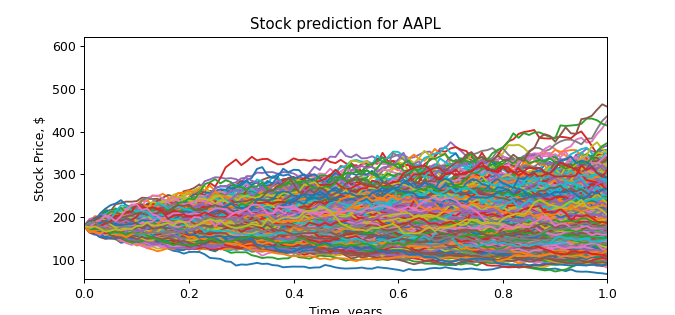

In [128]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0,t)
ax.set_ylim(0.95*y_min,1.05*y_max)
ax.set_xlabel('Time, years')
ax.set_ylabel('Stock Price, $')
plt.title(f'Stock prediction for {stock}')


time = np.linspace(0,t,n_steps+1)

def animate(i):
    line1 = ax.plot(time,St[:,i])
    
anim = FuncAnimation(fig,animate,frames=n_sims,interval=100)

Plot Probability Distribution of results
-------------------------
- Blue bar is the original stock price
- Red bar is the most probable price after a year

<IPython.core.display.Javascript object>


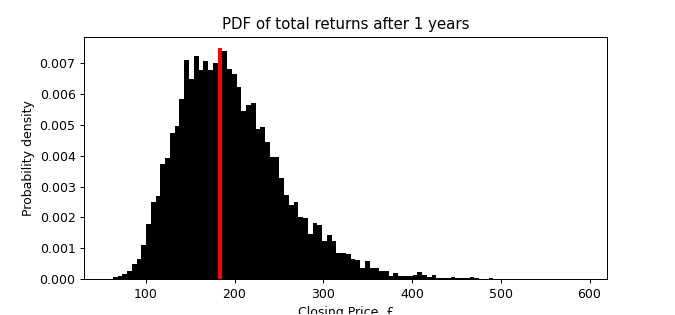

23 23


In [131]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.set_xlabel('Closing Price, £')
ax2.set_ylabel('Probability density')
plt.title(f'PDF of total returns after {t} years')
plt.rcParams["figure.figsize"] = [7.5, 3.5]

closing_prices = St[n_steps]
mean = np.mean(closing_prices)
std_dev = np.std(closing_prices)


bins_plot = np.linspace(y_min, y_max+1, 101)
N, bins, patches = ax2.hist(closing_prices, bins=bins_plot, density=1,color='black')


index_mean = price_to_binindex(mean)  
index_S0 = price_to_binindex(S0)
index_probable = N.tolist().index(max(N))


#patches[index_mean].set_facecolor('green')
patches[index_S0].set_facecolor('blue')
patches[index_probable].set_facecolor('r')

#If only one colour shows then the starting stock price is the most probable price in the time frame 

Define price-to-bin-index Function
----------------
- Given a closing price find the index of the bin it is in

In [108]:
def price_to_bin_index(price):
    for num in bins_plot:
        if price < num:
            index = bins_plot.tolist().index(num)
            return index

Define probability function
-------------------
- Function that finds the probability that a <= x <= b

In [109]:
def p_x(a,b):
    x = price_to_bin_index(a)
    y = price_to_bin_index(b)
    return round(np.sum(N[x:y+1] * np.diff(bins_plot[x:y+2])),4)

Notable Probabilities
----------------

In [132]:
p_increase = p_x(S0+1,y_max) #Probability stock has increased in given time frame
p_decrease = p_x(y_min,S0-1) #Probability stock has decreased in given time frame

print(f'Probability stock has increased in given time frame = {p_increase}')
print(f'Probability stock has decreased in given time frame = {p_decrease}')

Probability stock has increased in given time frame = 0.564
Probability stock has decreased in given time frame = 0.4759
